# HAMOYE AI INTERNSHIP 2022 STAGE C

# Name: Okamkpa Tobechukwu Gamaliel

# Hamoye ID: 154bc7593741f000

# Date: 6 SEPTEMBER 2022

In [14]:
#Import all necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import *    
from sklearn.model_selection import train_test_split  
from pandas.core.common import random_state
from sklearn.preprocessing import LabelEncoder
from pandas.core.common import random_state
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix 


In [2]:
#Load the dataset
electric_data=pd.read_csv(r'C:\Users\user\Downloads\Data_for_UCI_named.csv')

In [3]:
electric_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [5]:
#Statistical Description of the Dataset
electric_data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [6]:
#Checking for null values
electric_data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

As stated in the "instructions for tag-along project", the 'stab' column should be dropped and 'stabf' will remain as the sole dependent variable (binary classification). Also we were asked to split the data into 80-20 train-test split with random state of 1.

In [7]:
electric_data.drop('stab', axis=1, inplace=True)

In [10]:
#Defining features and target variable
X=electric_data.drop('stabf', axis=1)
y=electric_data['stabf']

In [11]:
#Performing an 80-20 train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)


It was also stated to Use the standard scaler to transform the train set (x_train, y_train) and the test set (x_test).

In [13]:
scaler = StandardScaler()

#transform the train set
transformed_train_data= scaler.fit_transform(x_train)
transformed_train_data = pd.DataFrame(transformed_train_data, columns = x_train.columns)

#transform the test set
transformed_test_data= scaler.transform(x_test)
transformed_test_data = pd.DataFrame(transformed_test_data,  columns = x_test.columns)

# Question 16

What is the accuracy on the test using the LGBM Classifier? In 4 decimal places

In [16]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [18]:
import lightgbm as lgb       #import LGBM Classifier
model_lgbm = lgb.LGBMClassifier(random_state=1)

model_lgbm.fit(transformed_train_data, y_train)

prediction_lgbm = model_lgbm.predict(transformed_test_data)

accuracy = accuracy_score(y_test, prediction_lgbm)
print("The accuracy of the LightGBM model is:  ", round(accuracy, 4))

The accuracy of the LightGBM model is:   0.9395


# Question 17

Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1. What are the best hyperparameters from the randomized search CV?

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 

In [24]:
extra_tree_classifier = ExtraTreesClassifier(random_state = 1)

#Setting parameters
param = {'n_estimators': [50, 100, 300, 500, 1000], 
         'min_samples_split': [2, 3, 5, 7, 9], 
         'min_samples_leaf': [1, 2, 4, 6, 8],
         'max_features': ['sqrt', 'log2', 'auto', None]
         }

Random_Search = RandomizedSearchCV(estimator = extra_tree_classifier, param_distributions= param , random_state = 1, n_iter=10, cv=5, scoring="accuracy",
                                   n_jobs = -1, verbose = 1)

In [25]:
RandomSearchResults = Random_Search.fit(transformed_train_data, y_train)
RandomSearchResults.best_params_        #finding the best parameters

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

# Question 18

Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?

In [26]:
new_extra_tree = ExtraTreesClassifier(random_state=1)

new_extra_tree.fit(transformed_train_data, y_train)

new_extra_prediction = new_extra_tree.predict(transformed_test_data)

In [27]:
accuracy_new_extra = accuracy_score(new_extra_prediction, y_test)
print("The accuracy of the new extra tree classifier model is:  ", round(accuracy_new_extra, 4))

The accuracy of the new extra tree classifier model is:   0.928


In [29]:
#training the model with the optimal hyperparameters
extra_tree_hyper= ExtraTreesClassifier(n_estimators = 1000, min_samples_split = 2, min_samples_leaf = 8, max_features = None, random_state=1)
extra_tree_hyper.fit(transformed_train_data, y_train)
extra_hyper_predict= extra_tree_hyper.predict(transformed_test_data)


In [30]:
accuracy_extra_hyper= accuracy_score(extra_hyper_predict, y_test)
print("The accuracy of the extra tree classifier model with hyperparameters is:  ", round(accuracy_extra_hyper, 4))

The accuracy of the extra tree classifier model with hyperparameters is:   0.927


In [31]:
accuracy_new_extra < accuracy_extra_hyper

False

# Question 20

Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?

In [33]:
extra_tree_classifier= ExtraTreesClassifier(random_state = 1)
extra_tree_classifier.fit(transformed_train_data, y_train)


ExtraTreesClassifier(random_state=1)

<AxesSubplot:>

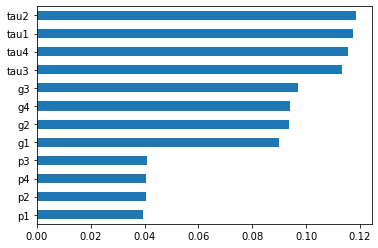

In [39]:
from matplotlib import pyplot
# get importance
importance = pd.Series(extra_tree_classifier.feature_importances_, index = X.columns).sort_values(ascending = True)
# summarize feature importance
importance.plot(kind = 'barh')


# THANK YOU